In [8]:

import torch

# 学习率
lr = 0.05

# 创建训练数据集
#  * 10的意思是将生成的张量中的每一个元素都乘以10
x = torch.rand(20, 1) * 10
print(x)

# 模拟生成目标值y
# 其中(5 + torch.randn(20,1)) 是添加噪音
y = 2 * x + (5 + torch.randn(20,1))
print(y)

tensor([[7.2062],
        [6.9841],
        [2.8702],
        [2.0352],
        [1.1294],
        [8.8122],
        [0.2998],
        [0.0255],
        [3.1978],
        [4.3296],
        [2.4662],
        [8.1568],
        [5.1717],
        [5.0856],
        [2.2432],
        [1.3529],
        [3.2423],
        [9.9943],
        [4.0453],
        [2.4086]])
tensor([[18.8210],
        [18.3044],
        [10.5692],
        [ 9.4837],
        [ 8.2645],
        [21.8426],
        [ 4.6882],
        [ 3.1070],
        [12.8445],
        [13.5253],
        [11.1336],
        [21.5460],
        [13.3357],
        [15.5735],
        [ 9.8400],
        [ 8.4388],
        [14.3331],
        [25.3518],
        [12.6962],
        [11.1930]])


In [9]:
# y = wx + b
# 初始化线性回归参数 只有一个元素的张量
# 一个随机值
w = torch.randn(1, requires_grad=True)
# 0
b = torch.zeros(1,requires_grad=True)
print(w)
print(b)



tensor([1.2633], requires_grad=True)
tensor([0.], requires_grad=True)


/var/folders/vt/w07vh8qn2874x8v1h954mc7c0000gn/T/ipykernel_62494/222734622.py:22: UserWarning: Glyph 65306 (\N{FULLWIDTH COLON}) missing from current font.
  plt.pause(0.5)


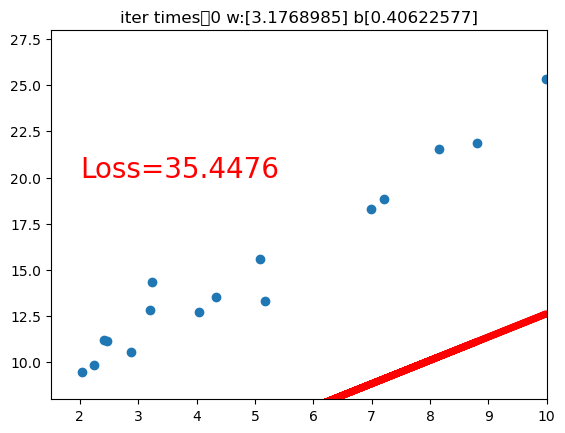

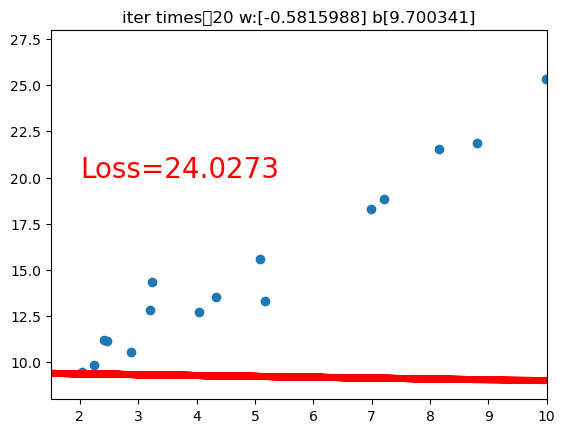

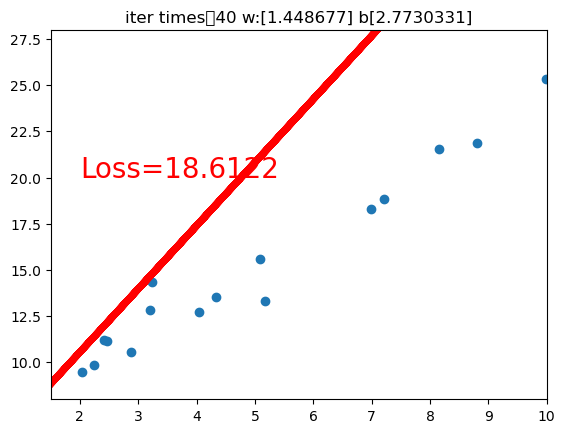

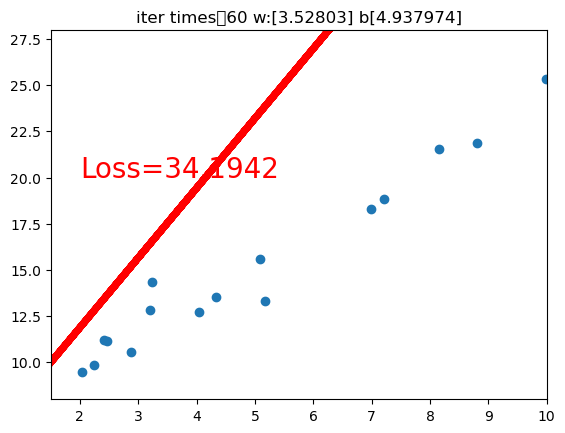

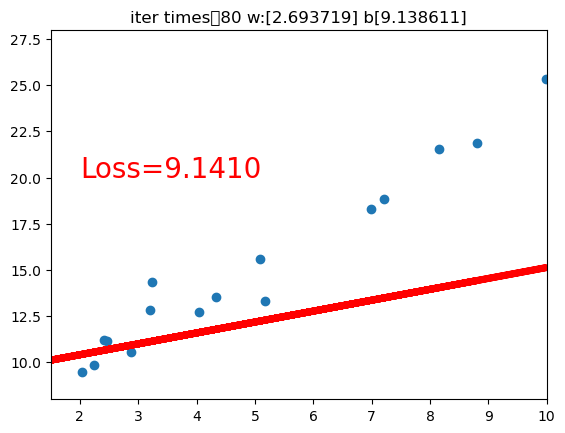

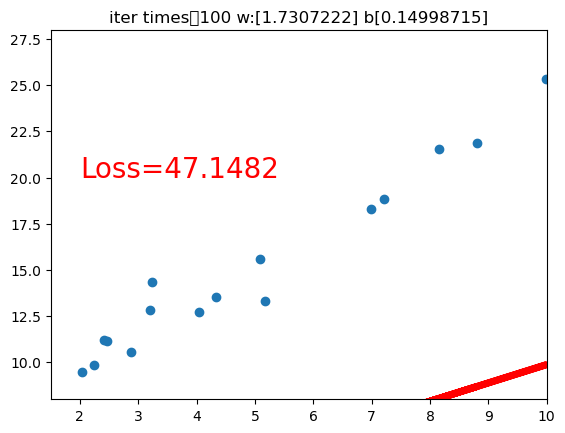

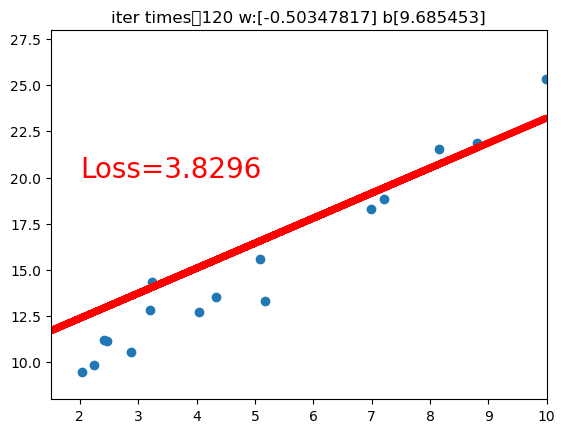

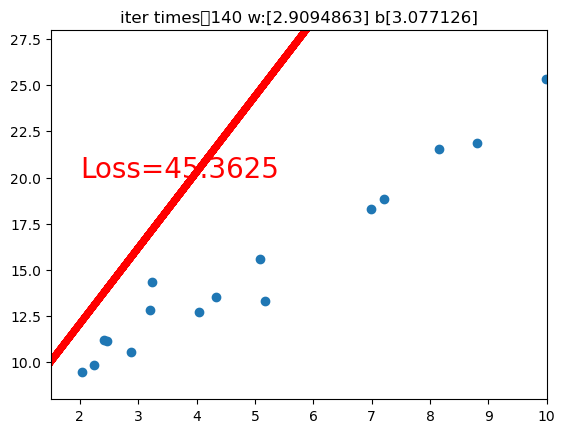

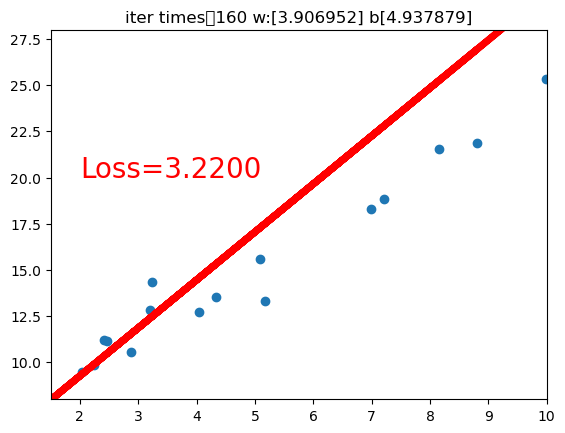

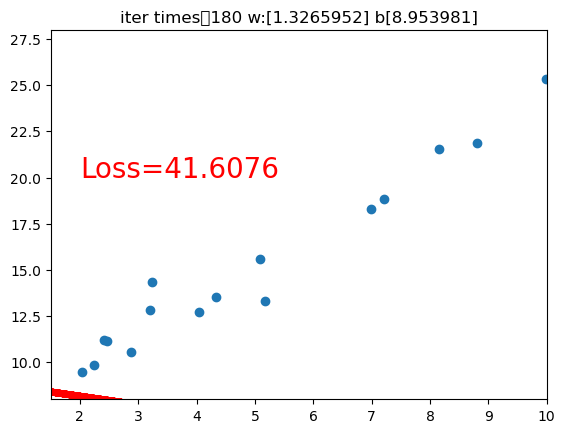

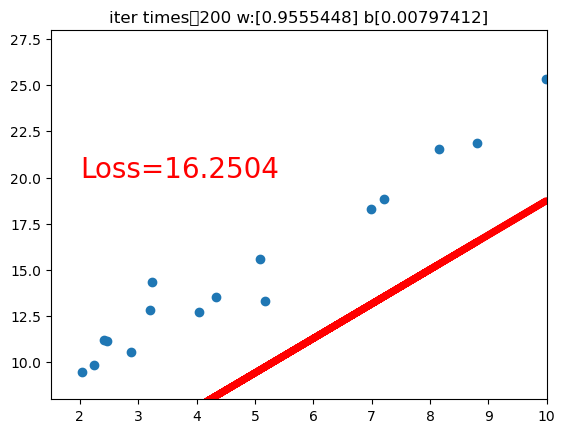

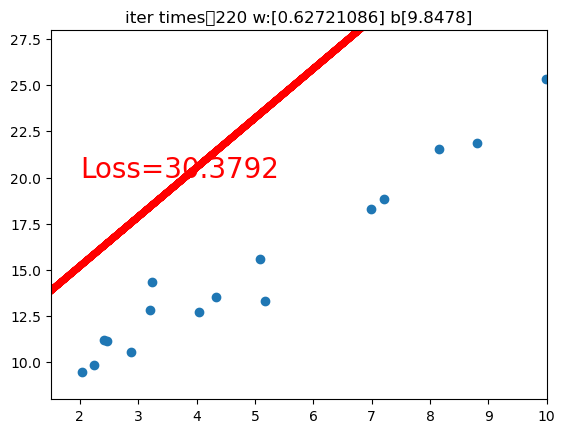

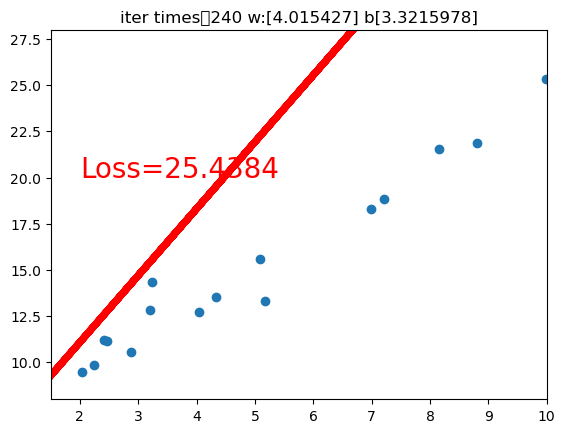

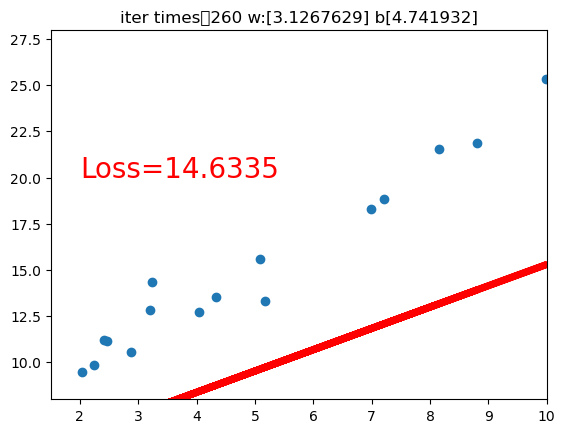

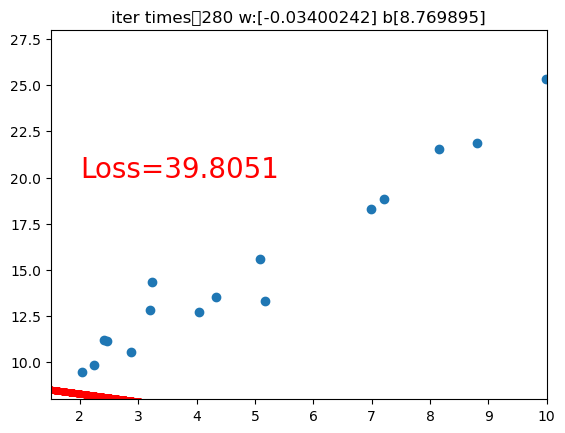

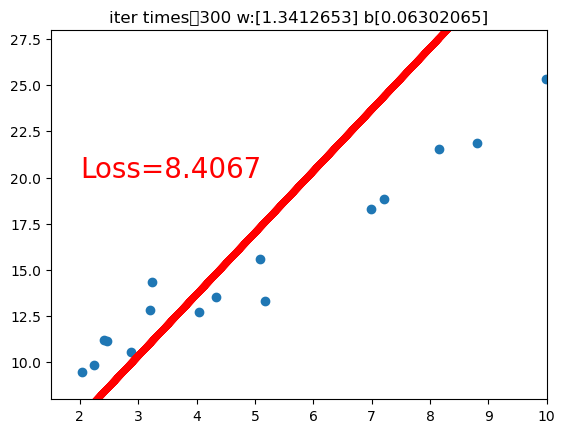

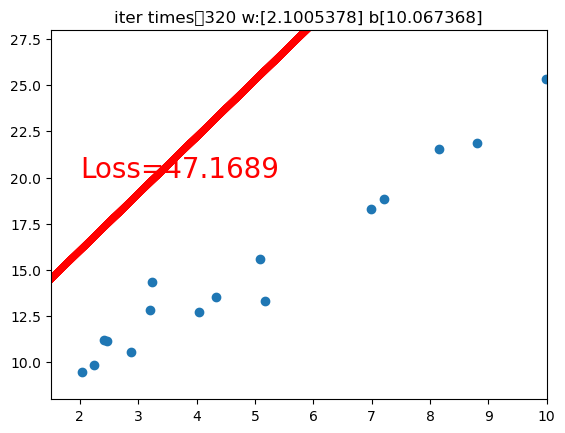

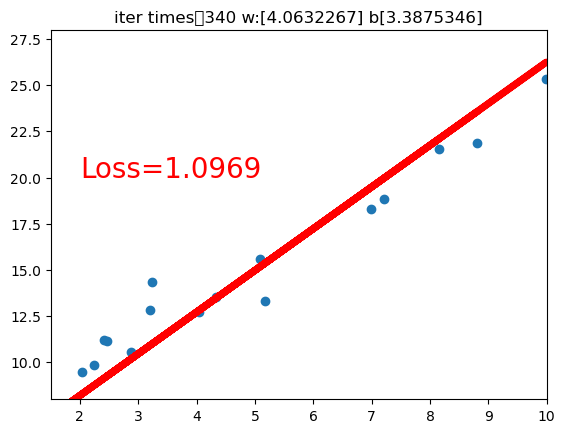

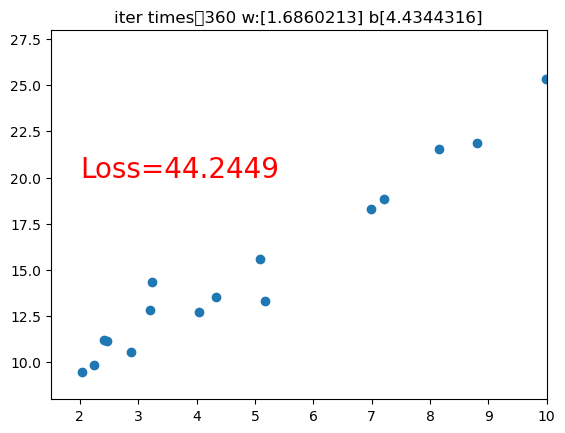

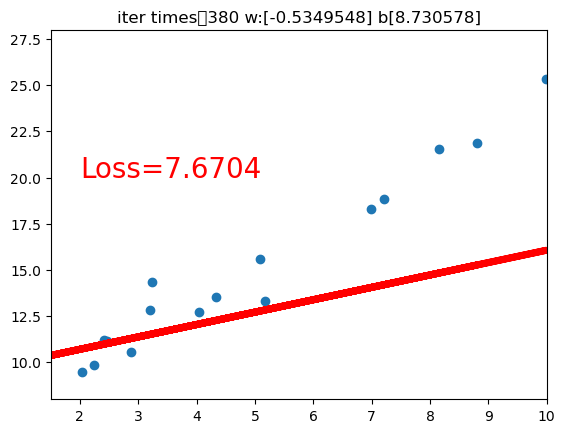

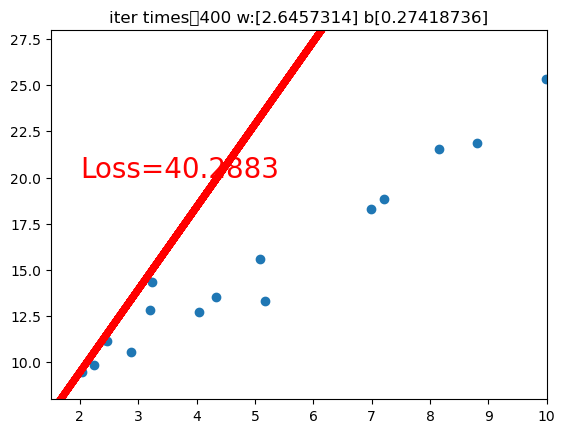

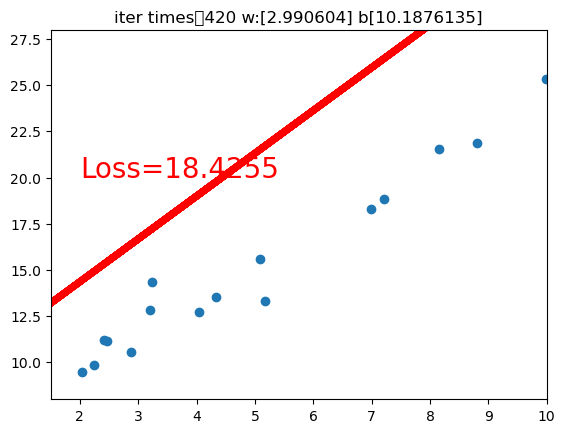

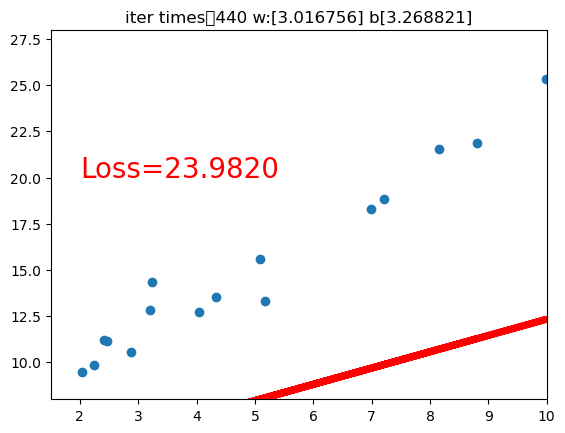

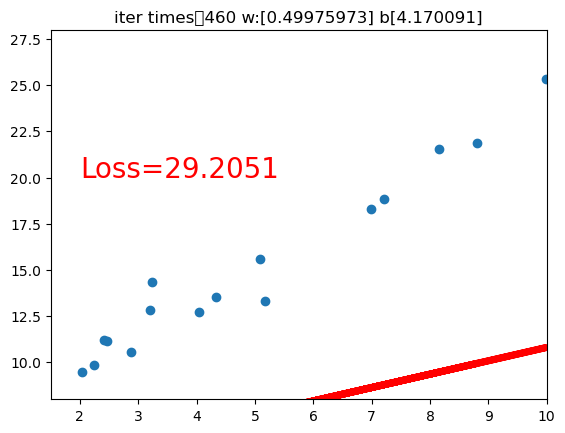

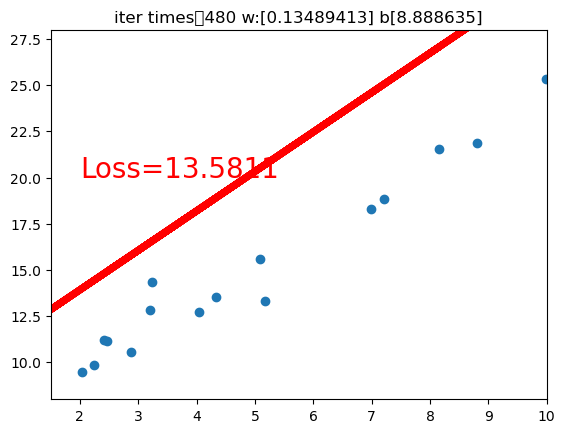

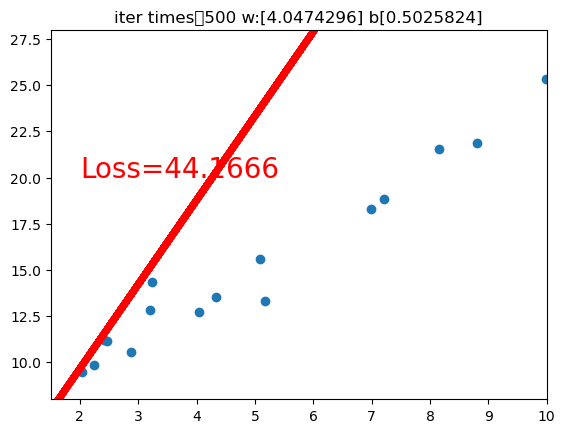

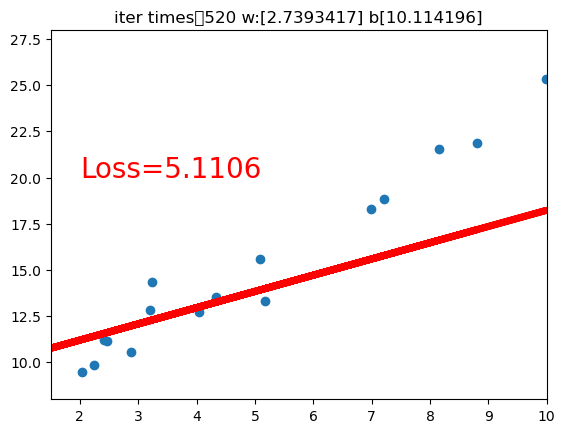

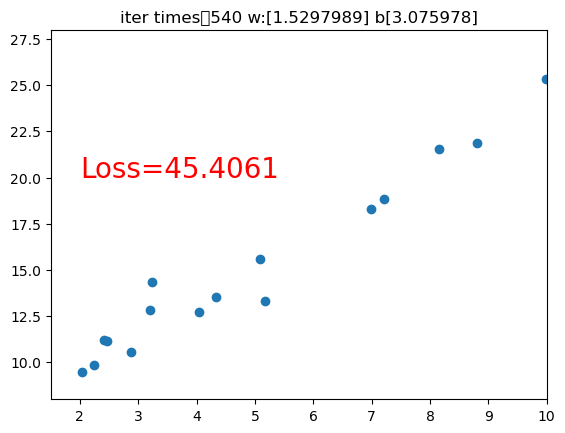

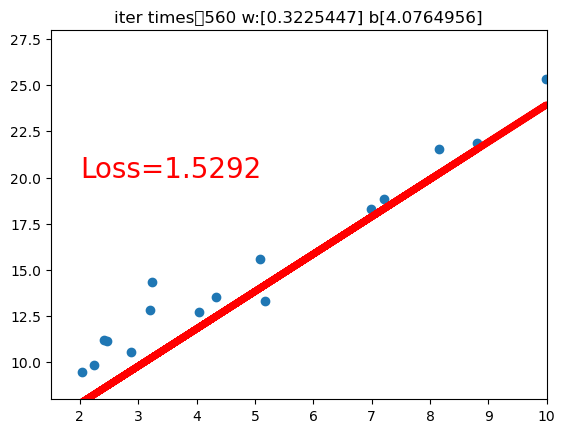

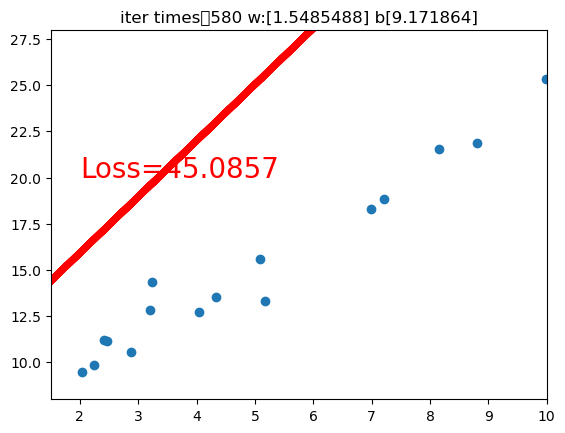

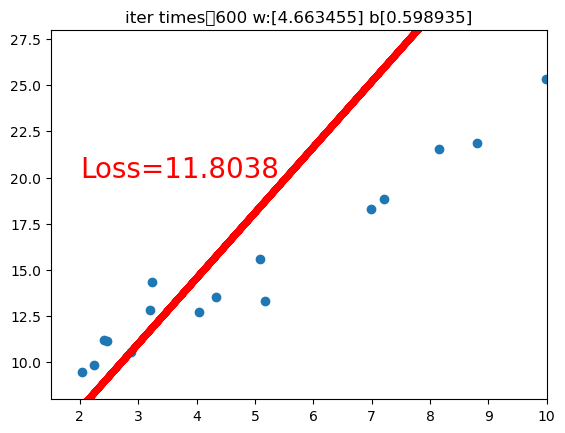

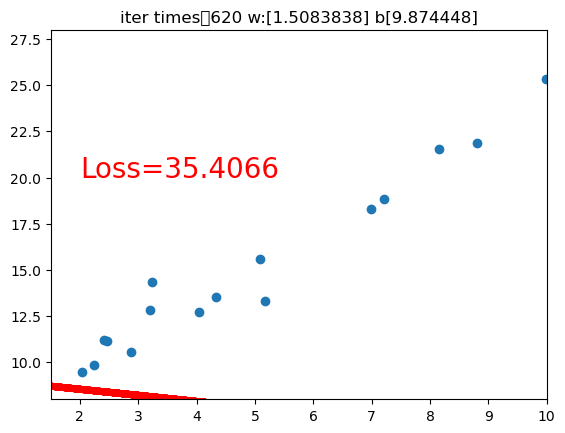

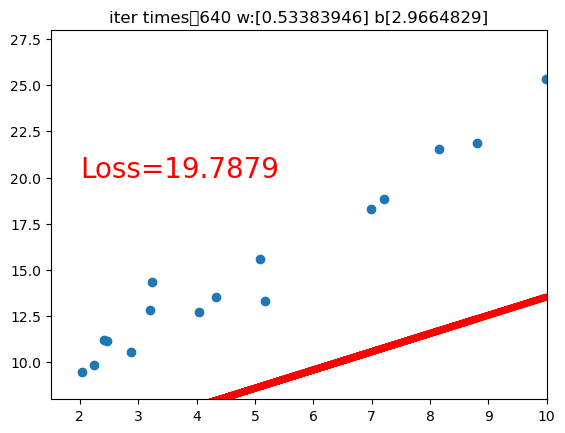

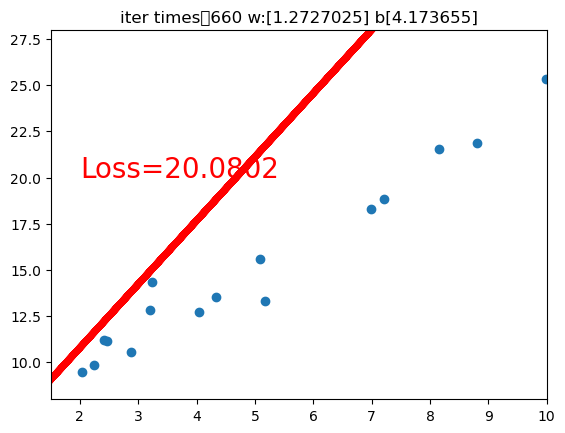

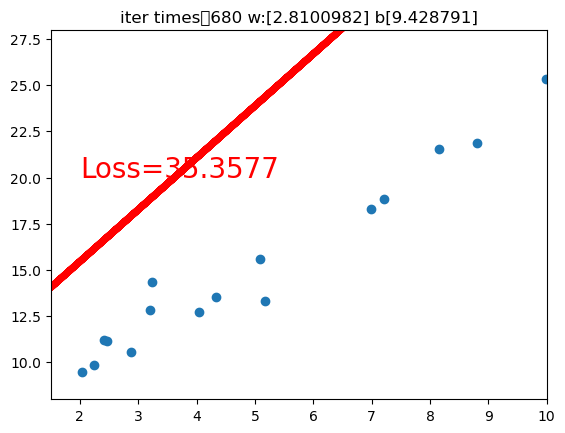

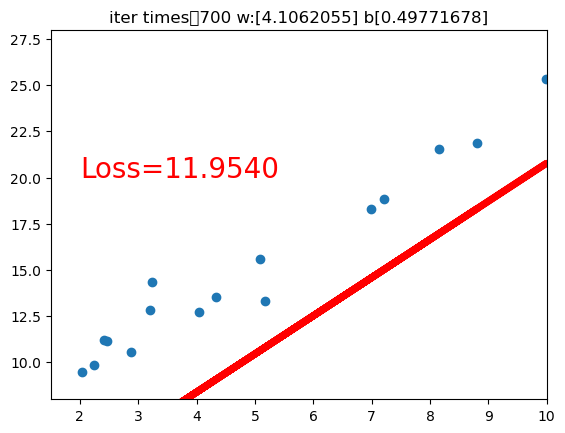

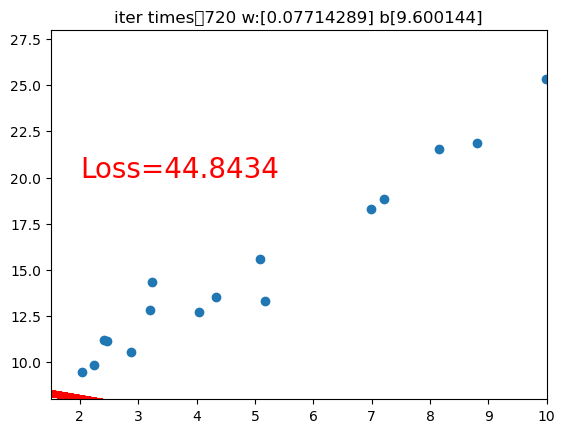

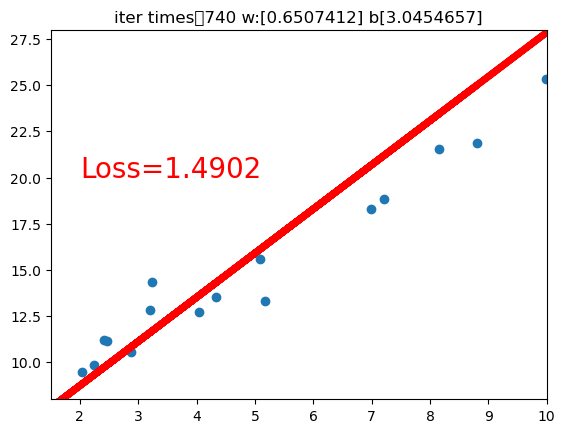

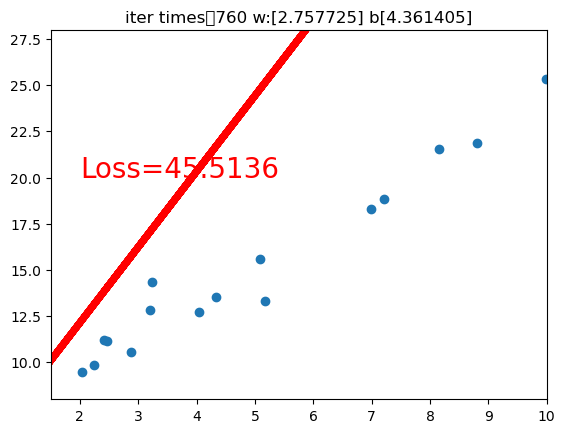

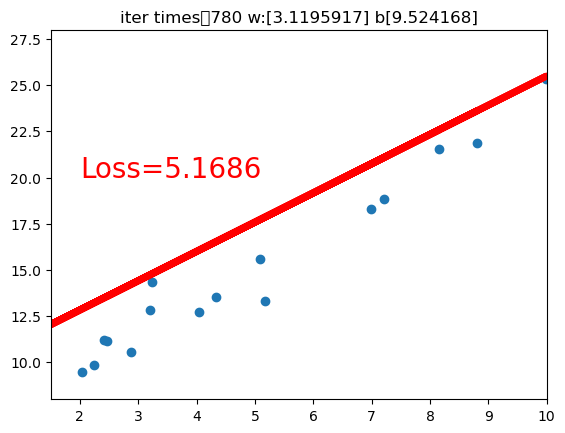

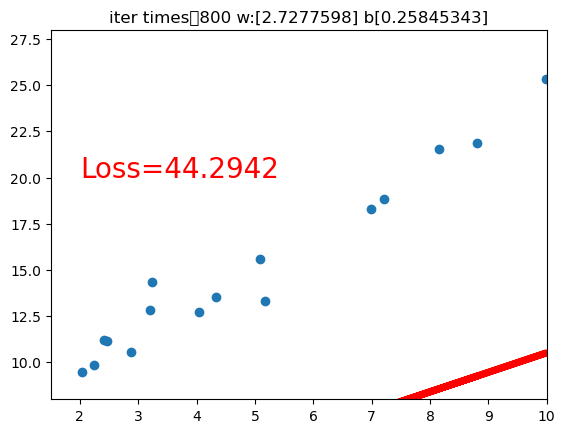

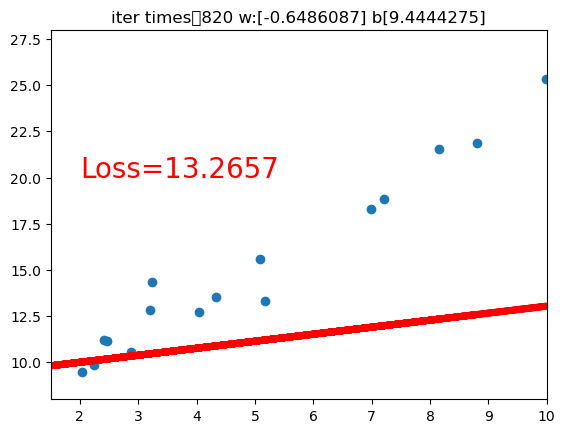

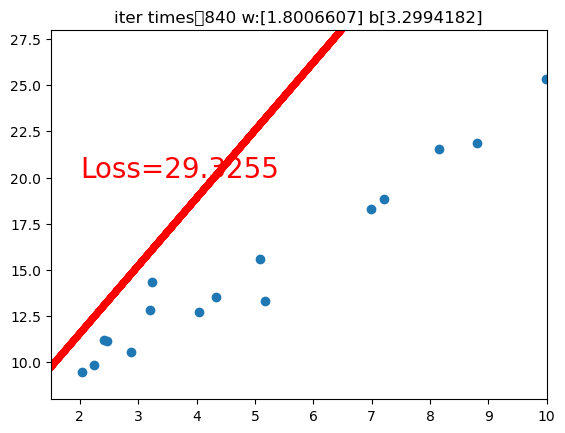

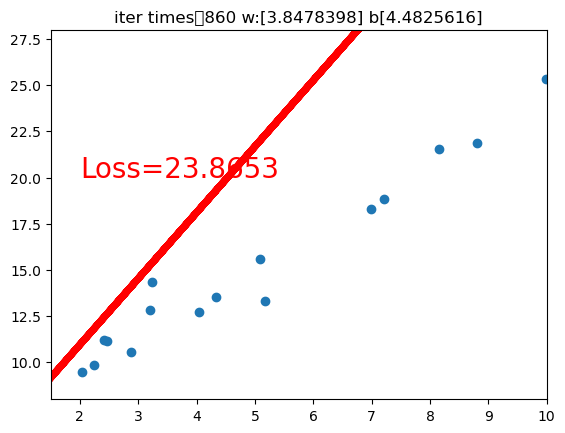

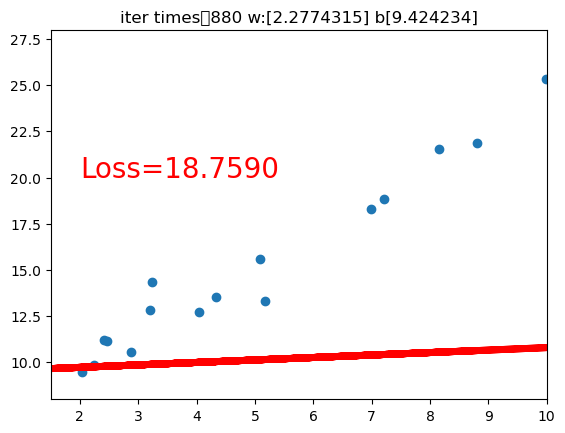

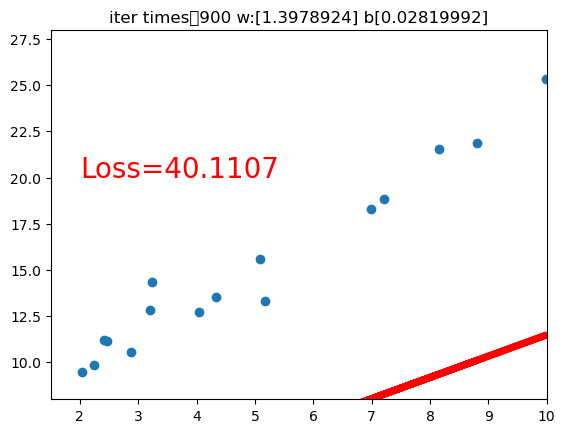

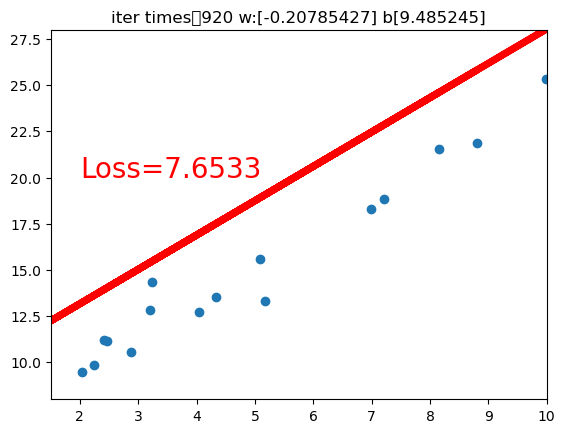

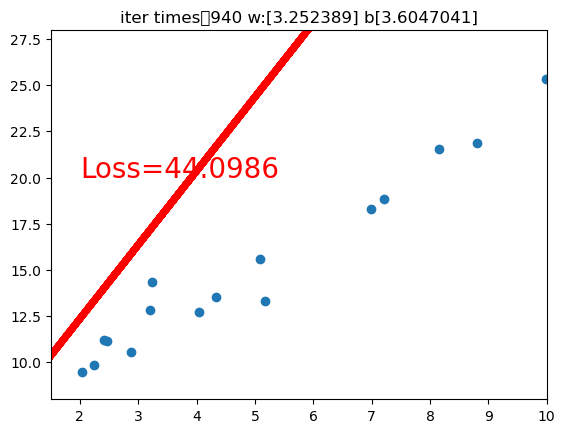

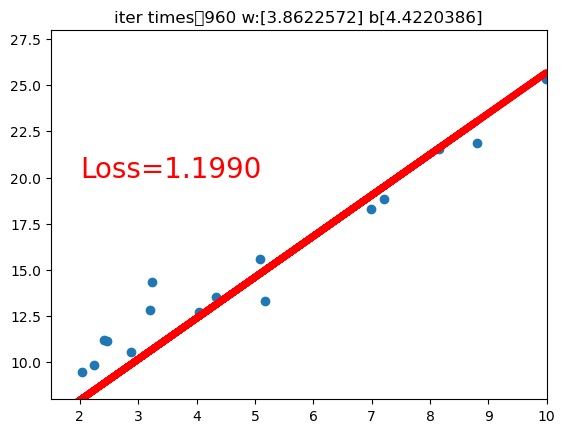

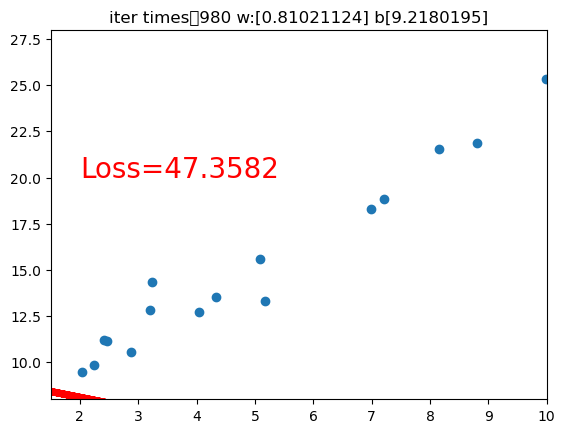

In [10]:
import matplotlib.pyplot as plt
for iter in range(1000):
    # 前向传播 使用torch按照公式构造计算图
    y_pred = torch.add(torch.mul(w, x), b)

    # 计算损失函数 MSE loss
    loss = (0.5 * (y - y_pred) ** 2).mean()

    # 反向传播 求导
    loss.backward()

    b.data.sub_(lr * b.grad)
    w.data.sub_(lr * w.grad)

    if iter % 20 == 0:
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),y_pred.data.numpy(),'r-',lw = 5)
        plt.text(2,20,'Loss=%.4f' % loss.data.numpy(),fontdict={'size':20,'color':'red'})
        plt.xlim(1.5,10)
        plt.ylim(8,28)
        plt.title("iter times：{} w:{} b{}".format(iter,w.data.numpy(),b.data.numpy()))
        plt.pause(0.5)
        if loss.data.numpy() < 1:
            break

# 思考题
损失函数为什么没有收敛